In [1]:
from __future__ import absolute_import, print_function, division, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
print (tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.0.0-rc0


In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

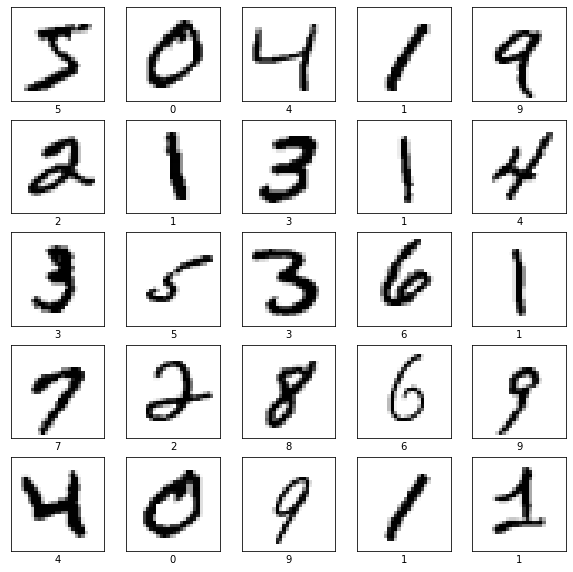

In [3]:
def plot_image(img, label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label)
    plt.imshow(img, cmap = plt.cm.binary)

num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure (figsize = (2 * num_cols, 2 * num_rows))
for i in range (num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image (train_images[i], train_labels[i])
plt.show()

In [4]:
def solve_mnist(model, lr, normalize, epochs):
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    if normalize:
        train_images = train_images / 255.0
        test_images = test_images / 255.0

    val_images = train_images[:5000]
    val_labels = train_labels[:5000]
    train_images = train_images[5000:]
    train_labels = train_labels[5000:]

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
    
    start_time = time.time()
    model.fit (train_images, train_labels, validation_data=(val_images, val_labels),
               epochs = epochs, verbose = 0)    
    end_time = time.time()
    loss, acc = model.evaluate(test_images, test_labels, verbose = 0)
    print ('Accuracy:', acc)
    print ('Time:', end_time - start_time)
    

In [5]:
model1 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense (32, activation = tf.nn.sigmoid),
    layers.Dense (10, activation = tf.nn.softmax)
])

In [6]:
model2 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense (32, activation = tf.nn.sigmoid),
    layers.Dense (32, activation = tf.nn.sigmoid),
    layers.Dense (10, activation = tf.nn.softmax)
])

In [7]:
model3 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense (32, activation = tf.nn.sigmoid),
    layers.Dense (32, activation = tf.nn.sigmoid),
    layers.Dense (32, activation = tf.nn.sigmoid),
    layers.Dense (10, activation = tf.nn.softmax)
])

In [8]:
EPOCHS = 10
solve_mnist(model1, lr = 0.1, epochs = EPOCHS, normalize = True)

Accuracy: 0.9533
Time: 30.865451335906982


In [9]:
print ('Without normalization')
solve_mnist(model1, lr = 0.1, epochs = EPOCHS, normalize = False)
print ('\nWith normalization')
solve_mnist(model1, lr = 0.1, epochs = EPOCHS, normalize = True)


Without normalization
Accuracy: 0.7739
Time: 29.64412546157837

With normalization
Accuracy: 0.9162
Time: 31.590876579284668


We see that difference in training time is negligible but there is a tremendous increase in 
accuracy for normalization.

In [10]:
print ('For 1 hidden layer')
solve_mnist(model1, lr = 0.1, epochs = EPOCHS, normalize = True)
print ('\nFor 2 hiddern layers')
solve_mnist(model2, lr = 0.1, epochs = EPOCHS, normalize = True)
print ('\nFor 3 hidden layers')
solve_mnist(model3, lr = 0.1, epochs = EPOCHS, normalize = True)


For 1 hidden layer
Accuracy: 0.9255
Time: 31.428951263427734

For 2 hiddern layers
Accuracy: 0.9559
Time: 34.27922606468201

For 3 hidden layers
Accuracy: 0.9575
Time: 33.58580708503723


The results are best for the model with 2 hidden layers. Though its very close to the one with 3 layers.

In [11]:
print ('For learning rate 0.001')
solve_mnist(model2, lr = 0.001, epochs = EPOCHS, normalize = True)
print ('\nFor learning rate 0.0001')
solve_mnist(model2, lr = 0.0001, epochs = EPOCHS, normalize = True)

For learning rate 0.001
Accuracy: 0.9586
Time: 32.82210040092468

For learning rate 0.0001
Accuracy: 0.9586
Time: 31.952175617218018


Accuracy is same for both models so we choose the 1 which takes less time. 
That is learning rate = 0.001

In [12]:
model4 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense (64, activation = tf.nn.sigmoid),
    layers.Dense (64, activation = tf.nn.sigmoid),
    layers.Dense (10, activation = tf.nn.softmax)
])

In [13]:
model5 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense (128, activation = tf.nn.sigmoid),
    layers.Dense (128, activation = tf.nn.sigmoid),
    layers.Dense (10, activation = tf.nn.softmax)
])

In [14]:
print ('For 32 nodes in hidden layer')
solve_mnist(model2, lr = 0.001, epochs = EPOCHS, normalize = True)

print ('\nFor 64 nodes in hidden layer')
solve_mnist(model4, lr = 0.001, epochs = EPOCHS, normalize = True)

print ('\nFor 128 nodes in hidden layer')
solve_mnist(model5, lr = 0.001, epochs = EPOCHS, normalize = True)

For 32 nodes in hidden layer
Accuracy: 0.9587
Time: 32.15068340301514

For 64 nodes in hidden layer
Accuracy: 0.5281
Time: 34.91430044174194

For 128 nodes in hidden layer
Accuracy: 0.5447
Time: 32.06821084022522


Model with 32 nodes in hidden layer works the best both in terms of time and accuracy.

In [15]:
#  tanh, relu and leaky relu
model6 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense (32, activation = tf.nn.tanh),
    layers.Dense (32, activation = tf.nn.tanh),
    layers.Dense (10, activation = tf.nn.softmax)
])
model7 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense (32, activation = tf.nn.relu),
    layers.Dense (32, activation = tf.nn.relu),
    layers.Dense (10, activation = tf.nn.softmax)
])
model8 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense (32, activation = tf.nn.leaky_relu),
    layers.Dense (32, activation = tf.nn.leaky_relu),
    layers.Dense (10, activation = tf.nn.softmax)
])

In [16]:
print ('For tanh activation function')
solve_mnist(model6, lr = 0.001, epochs = EPOCHS, normalize = True)

print ('\nFor relu activation function')
solve_mnist(model7, lr = 0.001, epochs = EPOCHS, normalize = True)

print ('\nFor leaky_relu activation function')
solve_mnist(model8, lr = 0.001, epochs = EPOCHS, normalize = True)

For tanh activation function
Accuracy: 0.8967
Time: 30.217352628707886

For relu activation function
Accuracy: 0.8976
Time: 32.43171739578247

For leaky_relu activation function
Accuracy: 0.9038
Time: 33.6391921043396


relu has the best Accuracy and training time.
Results have been much better for sigmoid as we have seen before.

Among the models that we have tried the best model is model2 the one with 2 hidden layers 
and 32 nodes in each hidden layer.
We choose the model based on the accuracy of the results we get. Though we have made assumptions of tuning each hyper-parameter independent of the others, this assumption however is not always true.